Import pandas and numpy to help evaluate the static problems

In [21]:
#import numpy, sympy, math, and pint to help evaluate the static problems
#create a unit registry object in pint

#!pip install numpy sympy pint
import numpy as np
from sympy import symbols, solve
from math import sqrt
from pint import UnitRegistry

ureg = UnitRegistry()
print(ureg)

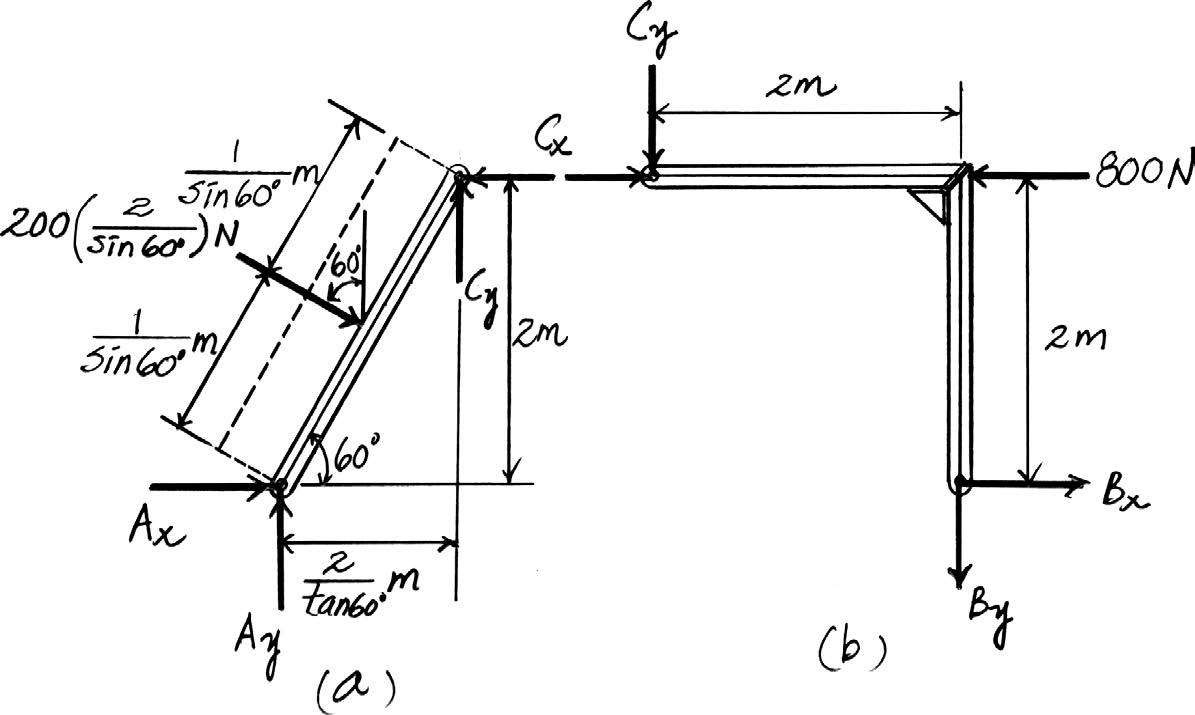

In [23]:
#import the image of the problem we need to solve and provide a visual for the user 

from PIL import Image
from IPython.display import display
prob2 = Image.open('FBD Problem #2.png')
display(prob2)

In [25]:
#User defining the loads
#values can be entered as values but code cannot continue if values aren't entered 

P_force1I = float(input("Enter Force-1 (point load) here: "))
P_force2I = float(input("Enter Force-2 (distrubuted load) here: "))
L1I = float(input("Enter length of each bar here: "))
theta_1I = float(input("Enter Angle-Theta here: "))

Enter Force-1 (point load) here:  800
Enter Force-2 (distrubuted load) here:  200
Enter length of each bar here:  2
Enter Angle-Theta here:  60


In [71]:
#creating a function to solve the static problem given 
#defining the forces based on user input

def forces_calculations(P_force1I,P_force2I,theta_1I,L1I): 
    P_force1 = float(P_force1I)
    P_force2 = float(P_force2I)
    L1 = float(L1I)
    theta_1 = float((theta_1I*np.pi)/180)
    
    #defining the unknowns of Cy and Cx
    Cx, Cy = symbols('Cx Cy')
    
    #solving the problem 
    #start with moment equations and use function to solve the system of equations
  
    Ma = (Cy*(L1/(np.tan(theta_1)))) + (Cx*L1) - ((P_force2)*(L1/np.sin(theta_1))*(1/np.sin(theta_1)))
    Mb = (Cy*L1) - (Cx*L1) + (P_force1*L1)
    solution = solve((Ma, Mb), (Cx, Cy))

    #convert to numerical solution
    Cx_value = float(solution[Cx].evalf())
    Cy_value = float(solution[Cy].evalf())

    #plugging in the numbers into more equations

    #equations to solve Ax and Ay
    Ax = (-P_force2)*(2/np.sin(theta_1))*np.sin(theta_1) + Cx_value
    Ay = (-Cy_value) + P_force2*(2/np.sin(theta_1))*np.cos(theta_1)

    #equations to solve Bx and By
    Bx = (-Cx_value) + P_force1
    By = (-Cy_value)

    #so now that we have all our reaction forces found, we find forces
    FC = int(sqrt((Cx_value**2) + (Cy_value**2))) 
    FB = int(sqrt((Bx**2) + (By**2))) 
    FA = int(sqrt((Ax**2) + (Ay**2))) 

    #adding units
    FC_units = FC * ureg.newton
    FB_units = FB * ureg.newton
    FA_units = FA * ureg.newton

    #returning the values as strings to print correctly
    FC_str = f"{FC_units.magnitude:.2f} {FC_units.units}"
    FB_str = f"{FB_units.magnitude:.2f} {FB_units.units}"
    FA_str = f"{FA_units.magnitude:.2f} {FA_units.units}"
    
    return FC_str, FB_str, FA_str, Ax, Ay, Bx, By, Cx_value, Cy_value

FC_str, FB_str, FA_str, Ax, Ay, Bx, By, Cx_value, Cy_value = forces_calculations(P_force1I,P_force2I,theta_1I,L1I)
print("Solution:")
print('FC:',FC_str, 'FB:',FB_str, 'FA:',FA_str)
print('Ax:',int(Ax),'newtons')
print('Ay:',int(Ay),'newtons')
print('Bx:',int(Bx),'newtons')
print('By:',int(By),'newtons')
print('Cx:',int(Cx_value),'newtons')
print('Cy:',int(Cy_value),'newtons')

Solution:
FC: 572.00 newton FB: 478.00 newton FA: 572.00 newton
Ax: 61 newtons
Ay: 569 newtons
Bx: 338 newtons
By: 338 newtons
Cx: 461 newtons
Cy: -338 newtons


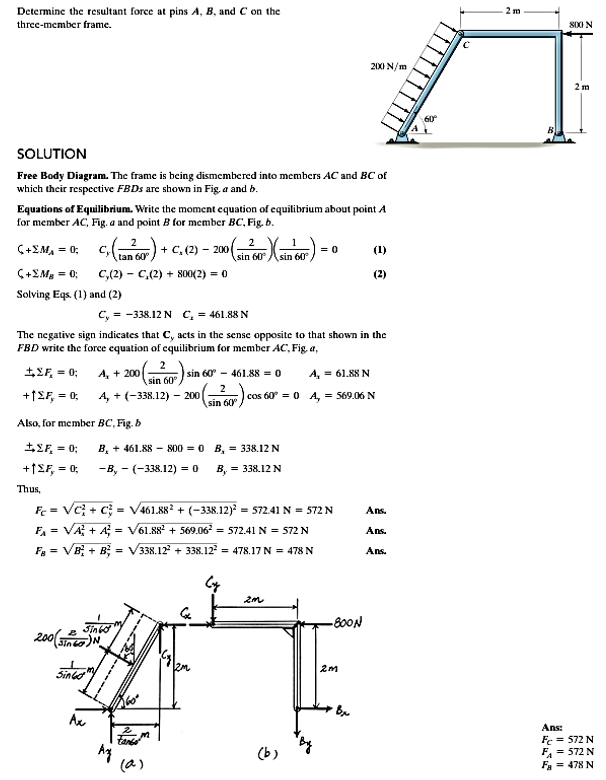

In [25]:
prob2_solution = Image.open('Problem #2 Solutions.png')
display(prob2_solution)